# Code your own SVM with hand-made gradient descent 🔥

Inspired by open-source notebook from Aurelien Geron [here](https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb)

## 0) Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import matplotlib.pyplot as plt
import os

# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64).reshape(-1, 1) # Iris virginica


(150, 2)
(150, 1)


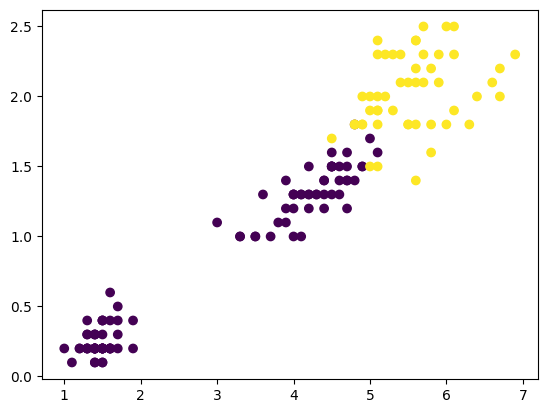

In [3]:
print(X.shape)
print(y.shape)
plt.scatter(X[:,0], X[:,1], c=y);

☝️ Let's now try to code our own linear SVM ourselves to fit this dataset

## 1) Read about SVM cost function (optional)


- Read "Aurelien Geron - Hands-On Machine Learning with Scikit-Learn (2019)" chapter 5 (Support Vector Machine)
- Understand the cost function of the linear SVM, $J(\mathbf{w}, b)$ below

<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/ML/svm_cost_function.png'>

👉 It requires you to buy the book, which is one of the best books in Data Science, well designed for Le Wagon students

## 2) Code your own Linear SVM model with hand-made Gradient Descent solver

❓ Implement the model below, subclassing scikit-learn `BaseEstimator` class

The `fit` method should minimize the cost function  $J(\mathbf{w}, b)$ by gradient descent, after random initialization of its weights $\mathbf{w}$ and bias $b$

In [ ]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000):
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.eta_d = eta_d

    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d)

    def fit(self, X, y):
        # TODO: Compute the weithgs w and b of the linear SVM by minimizing the cost function
        pass

    def decision_function(self, X):
        # TODO: What scalar should you compute so as to predict the class correctly ?
        pass

    def predict(self, X):
        return (self.decision_function(X) >= 0).astype(np.float64)

In [ ]:
# Check your gradient descent
model_custom = MyLinearSVC(C=2, eta0 = 10, eta_d = 1000, n_epochs=60000)
model_custom.fit(X, y)
model_custom.predict(np.array([[5, 2], [4, 1]]))

plt.plot(range(model_custom.n_epochs), model_custom.Js)
plt.axis([0, model_custom.n_epochs, 0, 100])

## 3) 🧪 Compare with scikit-learn default SVC

In [ ]:
model_scikit = SVC(kernel="linear", C=2)
model_scikit.fit(X, y.ravel())

In [ ]:
# Check that both models predict the same classes
assert (np.sum(np.abs(model_custom.predict(X).ravel() - model_scikit.predict(X).ravel())) == 0.)

In [ ]:
# Check that both models coefficients are quite close to each other
print(model_custom.intercept_, model_custom.coef_)
print(model_scikit.intercept_, model_scikit.coef_)

☝️ Note that `scikit-learn` Linear SVC is much faster to converge, as it is optimized via quadratic solving instead of gradient descent!

🏁 **Congratulation!** Don't forget to push and commit your results!